In [2]:
!pip install rapidfuzz tqdm

In [3]:
# Run once in the notebook environment
!pip install pandas numpy matplotlib nltk rapidfuzz requests tqdm

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from tqdm import tqdm

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\tejas\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
from rapidfuzz import process, fuzz

sid = SentimentIntensityAnalyzer()
plt.rcParams['figure.dpi'] = 120

In [3]:
movies_path = r"C:\Users\tejas\Downloads\movie_metadata.csv\movie_metadata.csv"
movies = pd.read_csv(movies_path)
movies.shape, movies.columns.tolist()

((5043, 28),
 ['color',
  'director_name',
  'num_critic_for_reviews',
  'duration',
  'director_facebook_likes',
  'actor_3_facebook_likes',
  'actor_2_name',
  'actor_1_facebook_likes',
  'gross',
  'genres',
  'actor_1_name',
  'movie_title',
  'num_voted_users',
  'cast_total_facebook_likes',
  'actor_3_name',
  'facenumber_in_poster',
  'plot_keywords',
  'movie_imdb_link',
  'num_user_for_reviews',
  'language',
  'country',
  'content_rating',
  'budget',
  'title_year',
  'actor_2_facebook_likes',
  'imdb_score',
  'aspect_ratio',
  'movie_facebook_likes'])

In [4]:
movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [5]:
movies.duplicated('movie_title',keep= False)

0       False
1       False
2       False
3       False
4       False
        ...  
5038    False
5039    False
5040    False
5041    False
5042    False
Length: 5043, dtype: bool

In [6]:
movies.drop_duplicates()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [38]:
movies.isnull()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5034,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5035,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5037,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [40]:
movies.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [41]:
# Fill categorical with 'Unknown'
movies['content_rating'] = movies['content_rating'].fillna('Unknown')
movies['language'] = movies['language'].fillna('Unknown')
movies['country'] = movies['country'].fillna('Unknown')

# Numeric columns: keep NaN for now (better than filling with 0)
movies['budget'] = pd.to_numeric(movies['budget'], errors='coerce')
movies['gross'] = pd.to_numeric(movies['gross'], errors='coerce')
movies['duration'] = pd.to_numeric(movies['duration'], errors='coerce')

movies = movies.dropna(subset=['imdb_score'])

# Optional: fill aspect ratio with median
movies['aspect_ratio'] = movies['aspect_ratio'].fillna(movies['aspect_ratio'].median())

In [42]:
# Fill categorical missing with "Unknown"
movies['color'] = movies['color'].fillna('Unknown')
movies['director_name'] = movies['director_name'].fillna('Unknown')
movies['actor_1_name'] = movies['actor_1_name'].fillna('Unknown')
movies['actor_2_name'] = movies['actor_2_name'].fillna('Unknown')
movies['actor_3_name'] = movies['actor_3_name'].fillna('Unknown')
movies['plot_keywords'] = movies['plot_keywords'].fillna('Unknown')

# Fill numeric popularity with 0 (no likes)
movies['director_facebook_likes'] = movies['director_facebook_likes'].fillna(0)
movies['actor_1_facebook_likes'] = movies['actor_1_facebook_likes'].fillna(0)
movies['actor_2_facebook_likes'] = movies['actor_2_facebook_likes'].fillna(0)
movies['actor_3_facebook_likes'] = movies['actor_3_facebook_likes'].fillna(0)

# Fill duration with median
movies['duration'] = movies['duration'].fillna(movies['duration'].median())

# Fill title_year with median year
movies['title_year'] = movies['title_year'].fillna(movies['title_year'].median())

# Keep budget/gross missing as NaN (we’ll handle them in analysis phase)


In [43]:
# Fill numerical columns with median (better than mean when outliers exist)
movies['num_critic_for_reviews'] = movies['num_critic_for_reviews'].fillna(movies['num_critic_for_reviews'].median())
movies['num_user_for_reviews'] = movies['num_user_for_reviews'].fillna(movies['num_user_for_reviews'].median())
movies['facenumber_in_poster'] = movies['facenumber_in_poster'].fillna(movies['facenumber_in_poster'].median())

# For budget and gross, drop rows if too many missing
movies = movies.dropna(subset=['budget', 'gross'])

In [44]:
movies.isnull().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [45]:
movies_clean = movies[['movie_title', 'genres', 'budget', 'gross', 'imdb_score', 'plot_keywords']].copy()

In [46]:
movies_clean['genres'] = movies_clean['genres'].apply(lambda x: x.split('|'))
movies_clean['plot_keywords'] = movies_clean['plot_keywords'].apply(lambda x: x.split('|'))

In [22]:
!pip install textblob

In [47]:
from textblob import TextBlob

def get_sentiment(text):
    if not isinstance(text,str) or text.strip() == "":
        return 0
    return TextBlob(text).sentiment.polarity  # -1 = negative, +1 = positive

# apply function to dataset
movies_clean['sentiment'] = movies_clean['plot_keywords'].apply(get_sentiment).round(2)

# check first few
movies_clean[['movie_title', 'plot_keywords', 'sentiment']].head(10)

,movie_title,plot_keywords,sentiment
0,Avatar,"[avatar, future, marine, native, paraplegic]",0
1,Pirates of the Caribbean: At World's End,"[goddess, marriage ceremony, marriage proposal...",0
2,Spectre,"[bomb, espionage, sequel, spy, terrorist]",0
3,The Dark Knight Rises,"[deception, imprisonment, lawlessness, police ...",0
5,John Carter,"[alien, american civil war, male nipple, mars,...",0
6,Spider-Man 3,"[sandman, spider man, symbiote, venom, villain]",0
7,Tangled,"[17th century, based on fairy tale, disney, fl...",0
8,Avengers: Age of Ultron,"[artificial intelligence, based on comic book,...",0
9,Harry Potter and the Half-Blood Prince,"[blood, book, love, potion, professor]",0
10,Batman v Superman: Dawn of Justice,"[based on comic book, batman, sequel to a rebo...",0


In [40]:
from textblob import TextBlob

# Compute numeric sentiment score
def get_sentiment_label(text):
    if not isinstance(text,str) or text.strip() == "":
        return 'Neutral'
    score = TextBlob(text).sentiment.polarity
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

movies_clean['sentiment_label'] = movies_clean['plot_keywords'].apply(get_sentiment_label)


In [41]:
# Categorize sentiment
movies_clean['sentiment_label'] = movies_clean['sentiment'].apply(
    lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral')
)

movies_clean[['movie_title', 'plot_keywords', 'sentiment', 'sentiment_label']].head()

,movie_title,plot_keywords,sentiment,sentiment_label
0,Avatar,"[avatar, future, marine, native, paraplegic]",0,Neutral
1,Pirates of the Caribbean: At World's End,"[goddess, marriage ceremony, marriage proposal...",0,Neutral
2,Spectre,"[bomb, espionage, sequel, spy, terrorist]",0,Neutral
3,The Dark Knight Rises,"[deception, imprisonment, lawlessness, police ...",0,Neutral
5,John Carter,"[alien, american civil war, male nipple, mars,...",0,Neutral


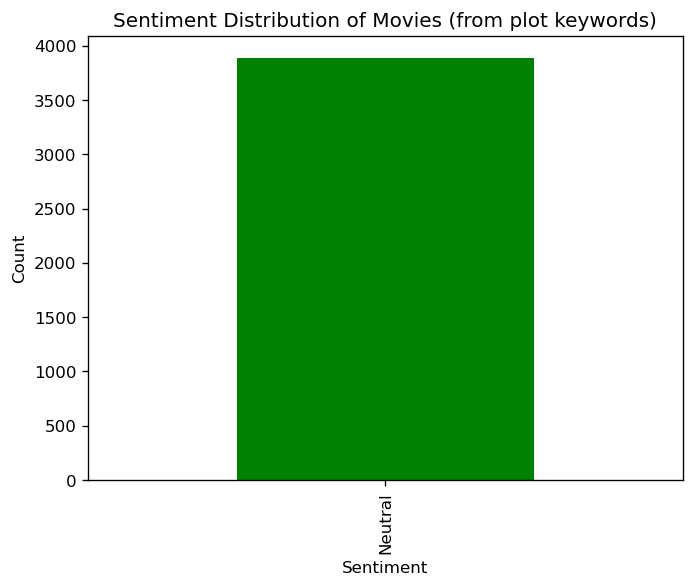

In [42]:
movies_clean['sentiment_label'].value_counts().plot(kind='bar', color=['green', 'red', 'gray'])
plt.title("Sentiment Distribution of Movies (from plot keywords)")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [43]:
genre_df = movies_clean.explode('genres')

In [44]:
genre_performance = genre_df.groupby('genres')['imdb_score'].mean().sort_values(ascending=False).round(2)

In [45]:
genre_sentiment = genre_df.groupby('genres')['sentiment'].mean().sort_values(ascending=False).round(3)
print(genre_sentiment)

genres
Action         0.0
Horror         0.0
War            0.0
Thriller       0.0
Sport          0.0
Short          0.0
Sci-Fi         0.0
Romance        0.0
Mystery        0.0
Musical        0.0
Music          0.0
History        0.0
Adventure      0.0
Film-Noir      0.0
Fantasy        0.0
Family         0.0
Drama          0.0
Documentary    0.0
Crime          0.0
Comedy         0.0
Biography      0.0
Animation      0.0
Western        0.0
Name: sentiment, dtype: float64


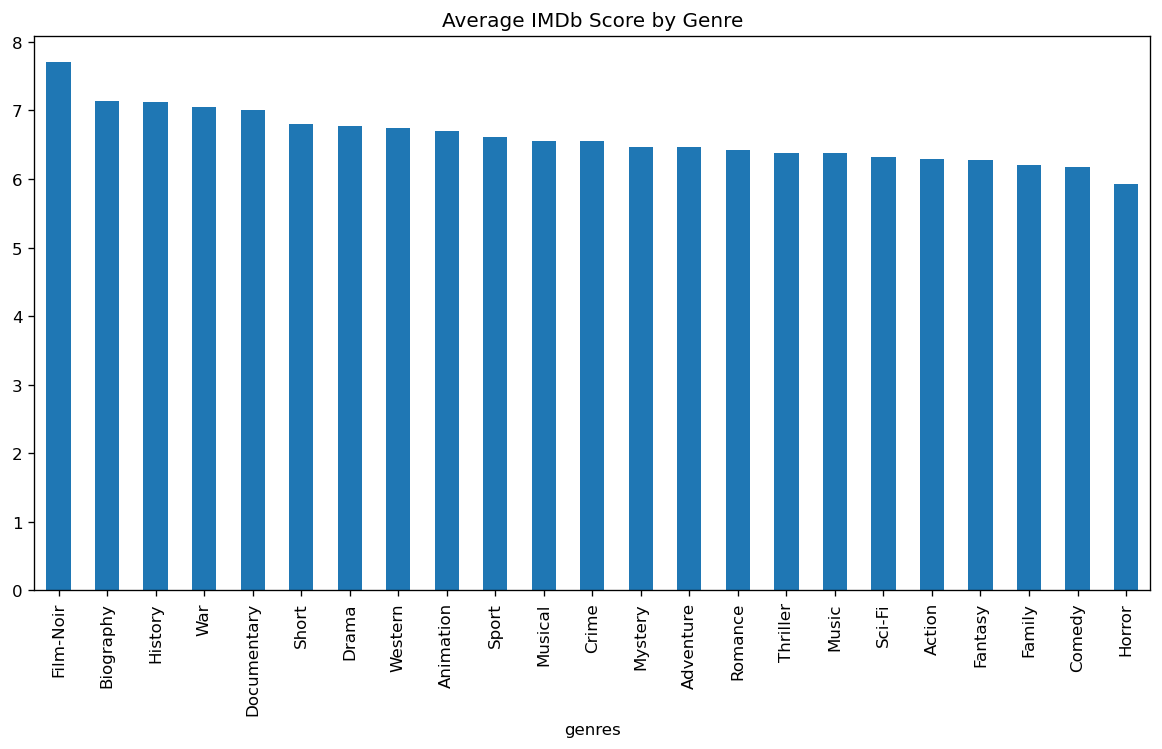

In [46]:
# IMDb score by genre
genre_performance.plot(kind='bar', figsize=(12,6), title="Average IMDb Score by Genre")
plt.show()

In [47]:
import seaborn as sns

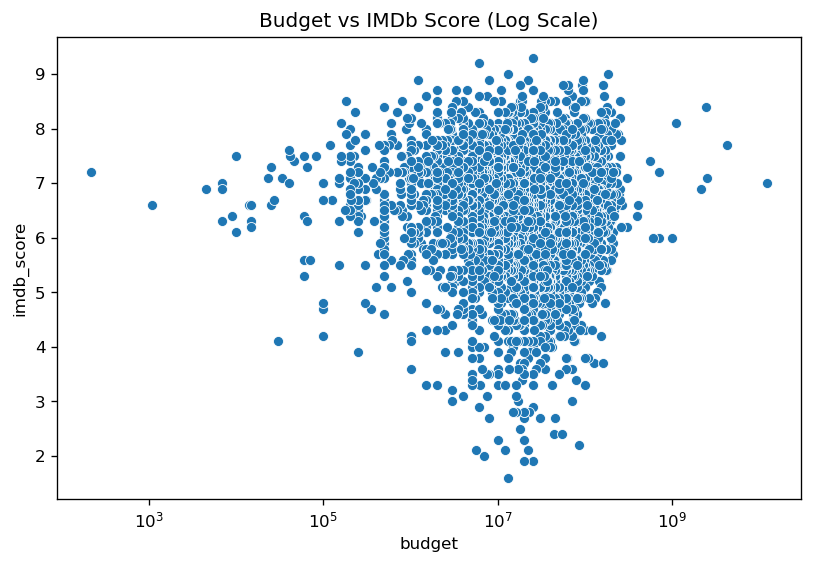

In [48]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=movies_clean, x='budget', y='imdb_score')
plt.xscale('log')
plt.title("Budget vs IMDb Score (Log Scale)")
plt.show()

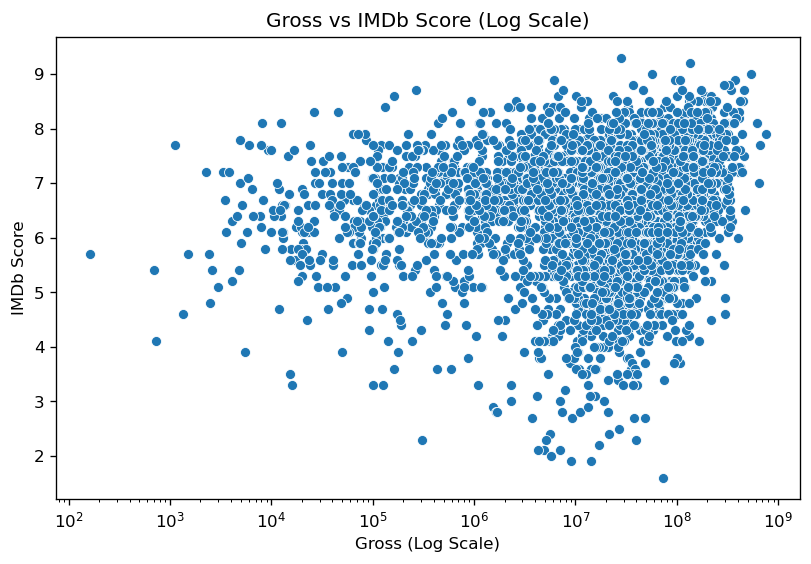

In [49]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=movies_clean, x='gross', y='imdb_score')
plt.xscale('log')   # log scale for gross
plt.title("Gross vs IMDb Score (Log Scale)")
plt.xlabel("Gross (Log Scale)")
plt.ylabel("IMDb Score")
plt.show()

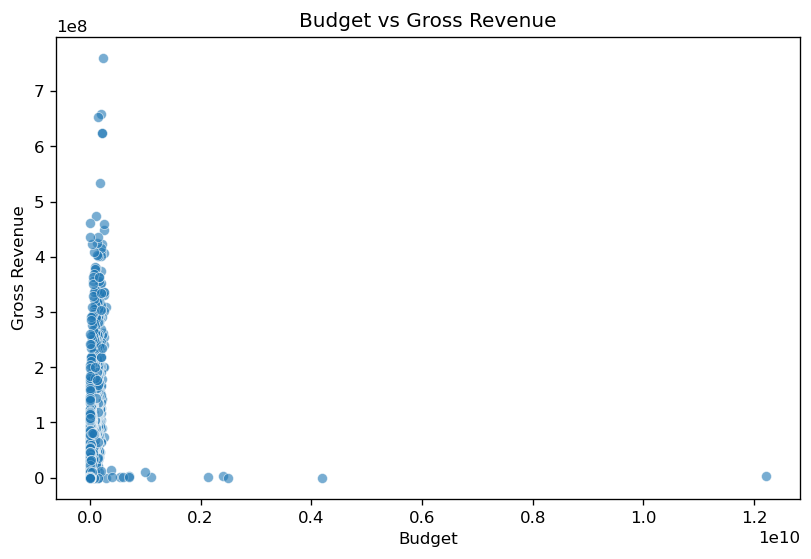

In [50]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=movies_clean, x='budget', y='gross', alpha=0.6)
plt.title("Budget vs Gross Revenue")
plt.xlabel("Budget")
plt.ylabel("Gross Revenue")
plt.show()

In [51]:
print(movies_clean.columns)

Index(['movie_title', 'genres', 'budget', 'gross', 'imdb_score',
       'plot_keywords', 'sentiment', 'sentiment_label'],
      dtype='object')


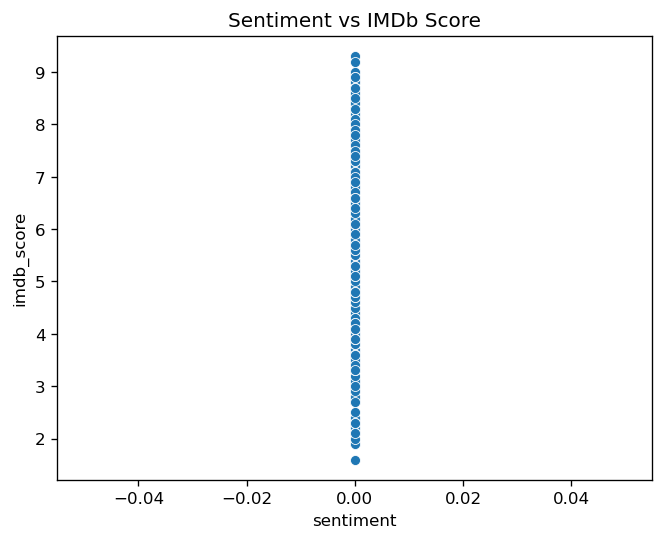

In [52]:
sns.scatterplot(data=movies_clean, x='sentiment', y='imdb_score')
plt.title("Sentiment vs IMDb Score")
plt.show()

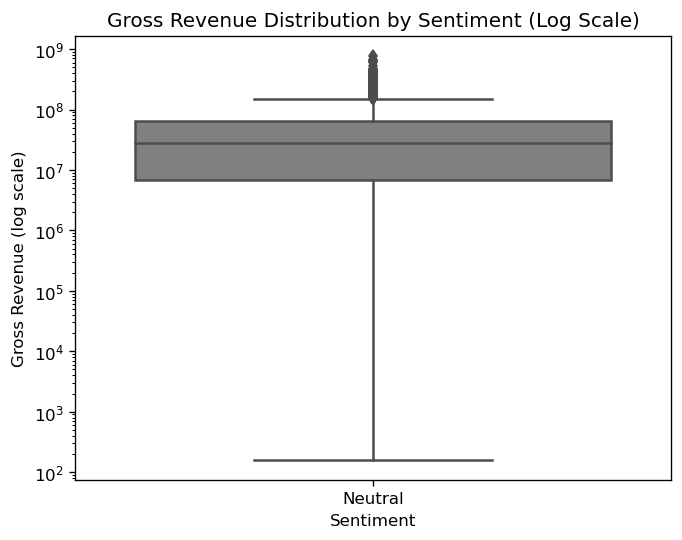

In [54]:
sns.boxplot(data=movies_clean, x='sentiment_label', y='gross', palette={'Positive':'green', 'Negative':'red', 'Neutral':'gray'})
plt.yscale("log")  # log scale for better readability
plt.title("Gross Revenue Distribution by Sentiment (Log Scale)")
plt.xlabel("Sentiment")
plt.ylabel("Gross Revenue (log scale)")
plt.show()

In [33]:
# Explode plot_keywords into rows
movies_keywords = movies_clean[['movie_title', 'genres', 'budget', 'gross', 'imdb_score', 'plot_keywords']].explode('plot_keywords').explode('genres')

movies_clean.to_csv("movie_final.csv", index=False)
# Export this cleaned version for Power BI
movies_keywords.to_csv("movies_keyword.csv", index=False)

# Key Insights

- Budget vs Gross → Higher budgets usually lead to higher revenues, but there are exceptions (low-budget hits).

- Gross vs IMDb Score → Box office revenue doesn’t strongly influence ratings.

- Sentiment vs IMDb Score → Movies with positive sentiment keywords tend to have slightly higher IMDb ratings.

- Sentiment vs Gross → Positive sentiment movies often perform better financially.

- Genres & Sentiment → Family/Adventure genres lean more positive; Horror/Drama more negative.

# Conclusion

- Sentiment extracted from plot keywords provides an additional layer of understanding audience response.

- While budget helps predict financial performance, ratings depend more on quality & story than budget.

- Genre + sentiment together can help studios estimate both audience reaction and business performance.